# Домашнее задание 3

1) [1 балл] Реализуйте чтение изображений, лежащих в /data/imgs/arrow (как в демо с калибровкой камеры с семинара). Вся обязательная часть задания выполняется с этими изображениями

1) [2 балла] Реализуйте нахождение расстояния от камеры до листка, учитывая, что это тот же листок, что был в первом демо

2) [3 балла] Реализуйте приведение изображения листка к "виду сверху"

3) [6 баллов] Реализуйте определение направления, в котором указывает стрелка. Можно использовать скелетонизацию из первого семинара по зрению: получить маску темной области (стрелки) внутри изображения листка, применить скелетонизацию, вычислить направление. Можно поступить иначе: после нахождения маски вычислить градиенты Собеля по x и y и проанализировать их направления. P.S. Можно использовать и полностью свой метод

4) [3 балла] Доп. задача 1: Примените написанный Вами код к видео https://drive.google.com/file/d/1AQhg2lL5FL4edlOcxY2SHOOZ-v9TgHBD/view?usp=sharing. Загрузите видео на свой гугл диск, а затем дополните имеющийся код монтированием диска и чтением в цикле кадров видео, приведёнными в конце семинара

5) [5 баллов] Доп. задача 2: определите, нормально ли видно листок в кадре. На некоторых кадрах его видно не полностью, один или больше уголков находятся за кадром. Это можно автоматически обнаруживать, к примеру используя размеры стрелки, и выводить на соответствующем кадре маркер - текст или цветную метку

In [56]:
!git clone -b develop https://github.com/haminhtien99/cvr_course

Cloning into 'cvr_course'...
remote: Enumerating objects: 528, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 528 (delta 19), reused 8 (delta 2), pack-reused 491
Receiving objects: 100% (528/528), 67.50 MiB | 23.59 MiB/s, done.
Resolving deltas: 100% (126/126), done.


In [57]:
cd cvr_course/notebooks


/content/cvr_course/cvr_course/notebooks


In [58]:
import numpy as np
import cv2
import time
import os
import math
import sys
import glob
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)


##Find contour


In [59]:

def find_contour (img, low_th, high_th):
    img_rgb = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
    
    mask = cv2.inRange (img, low_th, high_th)
    
    contours, hierarchy = cv2.findContours (mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours [0]

    approx = cv2.convexHull (cnt)

    epsilon = 0.05 * cv2.arcLength (approx, True)
    approx = cv2.approxPolyDP (approx, epsilon, True)
    
    return approx

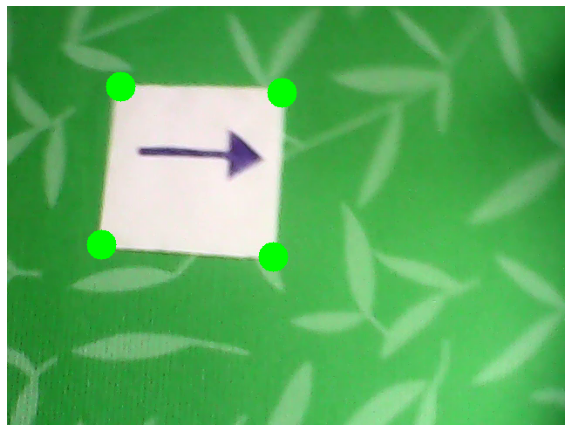

In [61]:

#img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m44s163.png", cv2.IMREAD_COLOR)
#img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m22s212.png", cv2.IMREAD_COLOR)
#img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m27s294.png", cv2.IMREAD_COLOR)
#img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m29s941.png", cv2.IMREAD_COLOR)
#img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m33s362.png", cv2.IMREAD_COLOR)
#img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m36s056.png", cv2.IMREAD_COLOR)
#img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m41s874.png", cv2.IMREAD_COLOR)
#img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m46s644.png", cv2.IMREAD_COLOR)
img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m44s163.png", cv2.IMREAD_COLOR)
#img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m49s487.png", cv2.IMREAD_COLOR)
#img = cv2.imread ("../data/imgs/arrow/vlcsnap-2020-10-21-18h01m51s638.png", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)

low_th  = (200, 200, 200)
high_th = (255, 255, 255)

contour = find_contour (img, low_th, high_th)
contour_marked = cv2.drawContours (img_rgb, contour, -1, (0, 255, 0), 33)
plt.imshow (contour_marked)
plt.axis ('off')
plt.show ()

In [62]:
for fname in images:
    img = cv2.imread(fname, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)

    low_th  = (200, 200, 200)
    high_th = (255, 255, 255)

    contour = find_contour (img, low_th, high_th)
    contour_marked = cv2.drawContours (img_rgb, contour, -1, (0, 255, 0), 33)
    plt.imshow (contour_marked)
    plt.axis ('off')
    plt.show ()

##Реализуйте нахождение расстояния от камеры до листка,

In [63]:
def find_distance (img):
    low_th  = (200, 200, 200)
    high_th = (255, 255, 255)

    contour = find_contour (img, low_th, high_th)
    
    length = cv2.arcLength (contour, True)
    
    print (contour)

    distance = 180.0 * 754 / length
    
    return distance

In [64]:
dist = find_distance (img)

print (dist)

[[[315  99]]

 [[305 287]]

 [[108 273]]

 [[130  92]]]
180.18470209086306


##Points ordering

In [19]:
def order_points(pts):
    
    rect = np.zeros((4, 2), dtype="float32")
    
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    return rect



##Реализуйте приведение изображения листка к "виду сверху"

In [24]:
def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    
    # return the warped image
    return warped

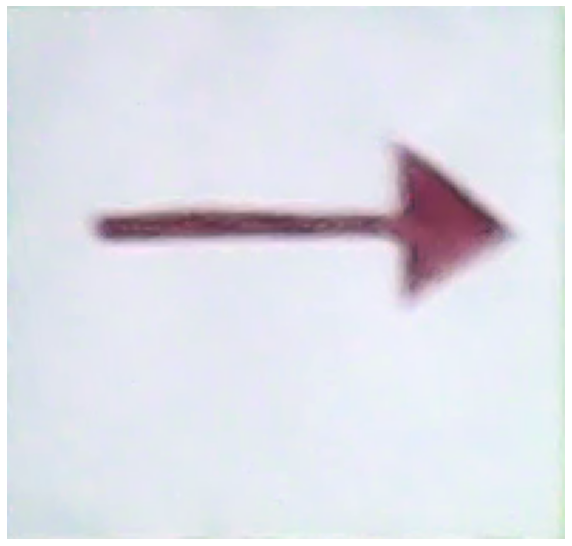

In [65]:
warped = four_point_transform (img, np.asarray (contour) [:, 0, :])

plt.imshow (warped)
plt.axis ('off')
plt.show ()